Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = 'dataset/'

In [3]:
dataset = pd.read_csv(PATH + 'dataset.csv')

In [4]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [6]:
dataset.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
dataset[dataset.isna().any(axis=1)].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False


In [8]:
dataset_no_na = dataset.fillna(0)
dataset_no_na.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

C:\Users\Piyush\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


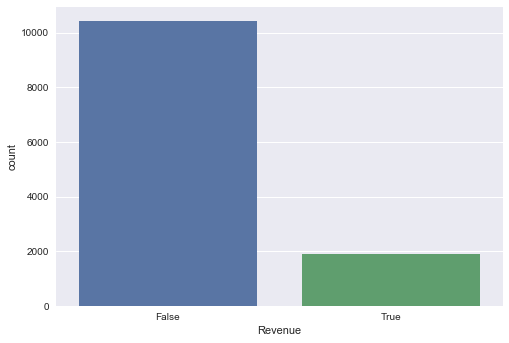

In [9]:
sns.countplot(dataset_no_na['Revenue'])

In [10]:
dataset_no_na['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [11]:
def plot_countplot(features, data, univariate=True, target=None):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    i = 0
    
    if univariate:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            sns.countplot(data[feature])    
    else:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            sns.countplot(data[feature], hue=dataset_no_na[target])   

In [12]:
cat = dataset_no_na.columns[9:-1]

C:\Users\Piyush\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


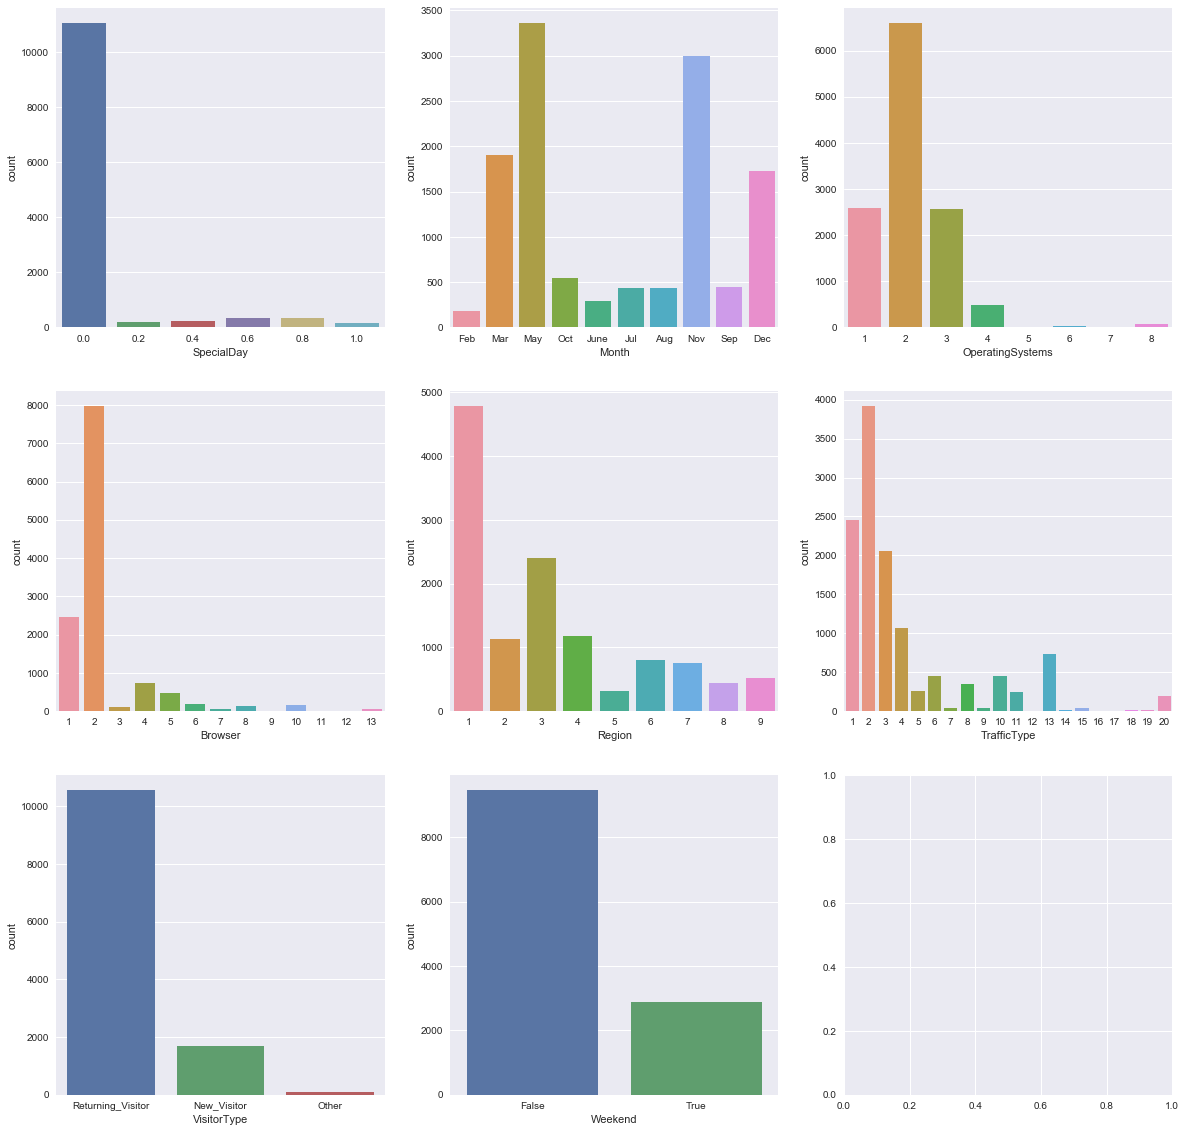

In [13]:
plot_countplot(data=dataset_no_na, features=cat, univariate=True)

C:\Users\Piyush\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


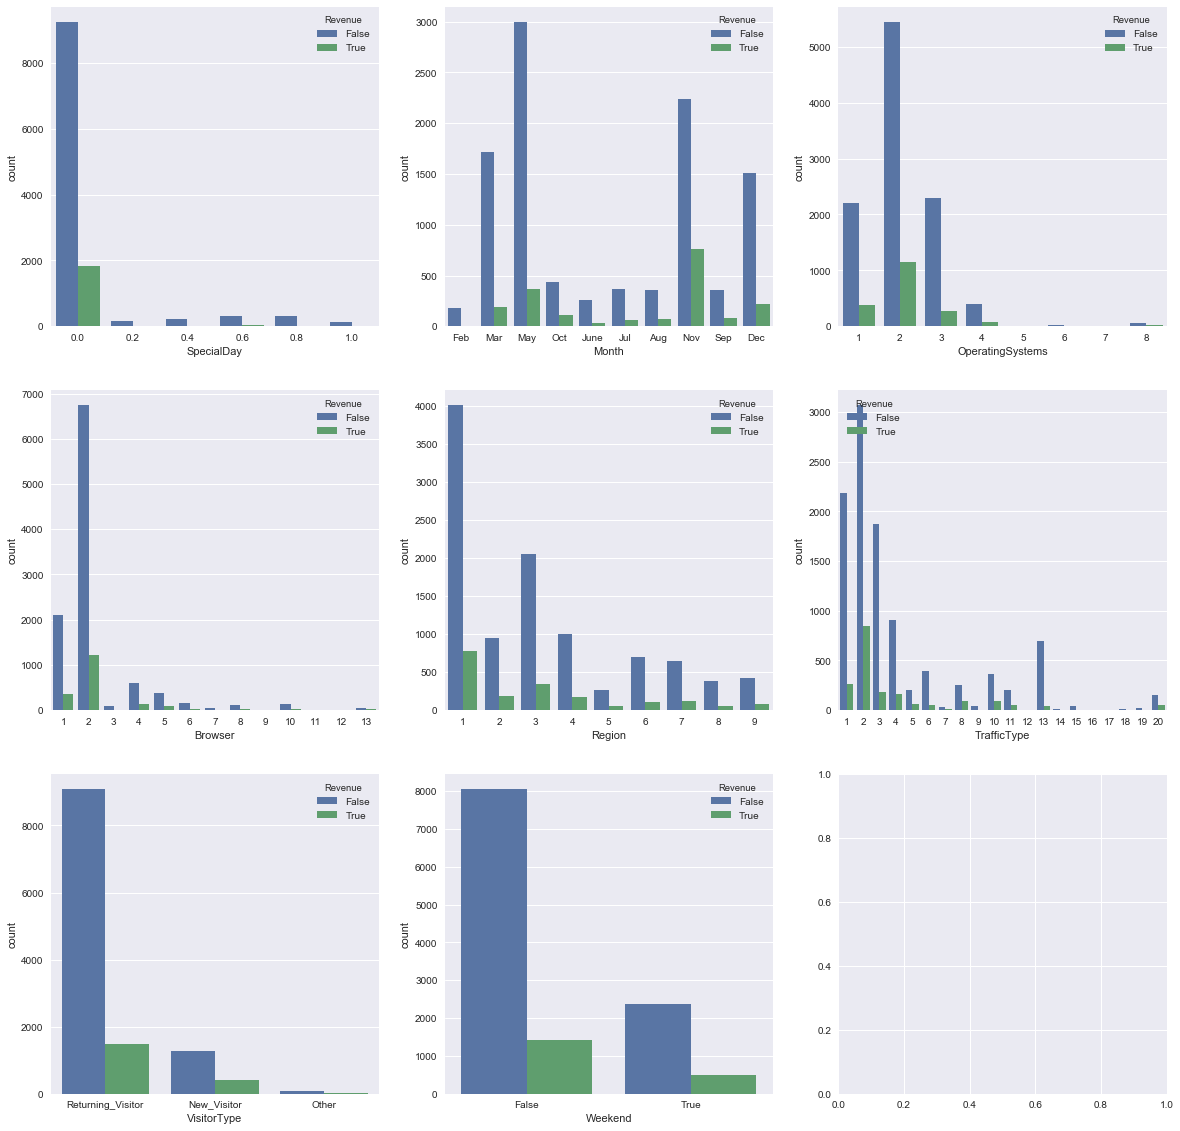

In [14]:
plot_countplot(data=dataset_no_na, features=cat, univariate=False, target='Revenue')

In [15]:
def plot_distplot(features, data, univariate=True, target=None):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    i = 0
    
    if univariate:
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            plt.title(feature)
            data[feature].plot(kind='kde')
    else:        
        for feature in features:
            i += 1
            plt.subplot(3, 3, i)
            plt.title(feature)
            data.groupby(target)[feature].plot(kind='kde', legend=True)

In [16]:
cont = dataset_no_na.columns[:9]

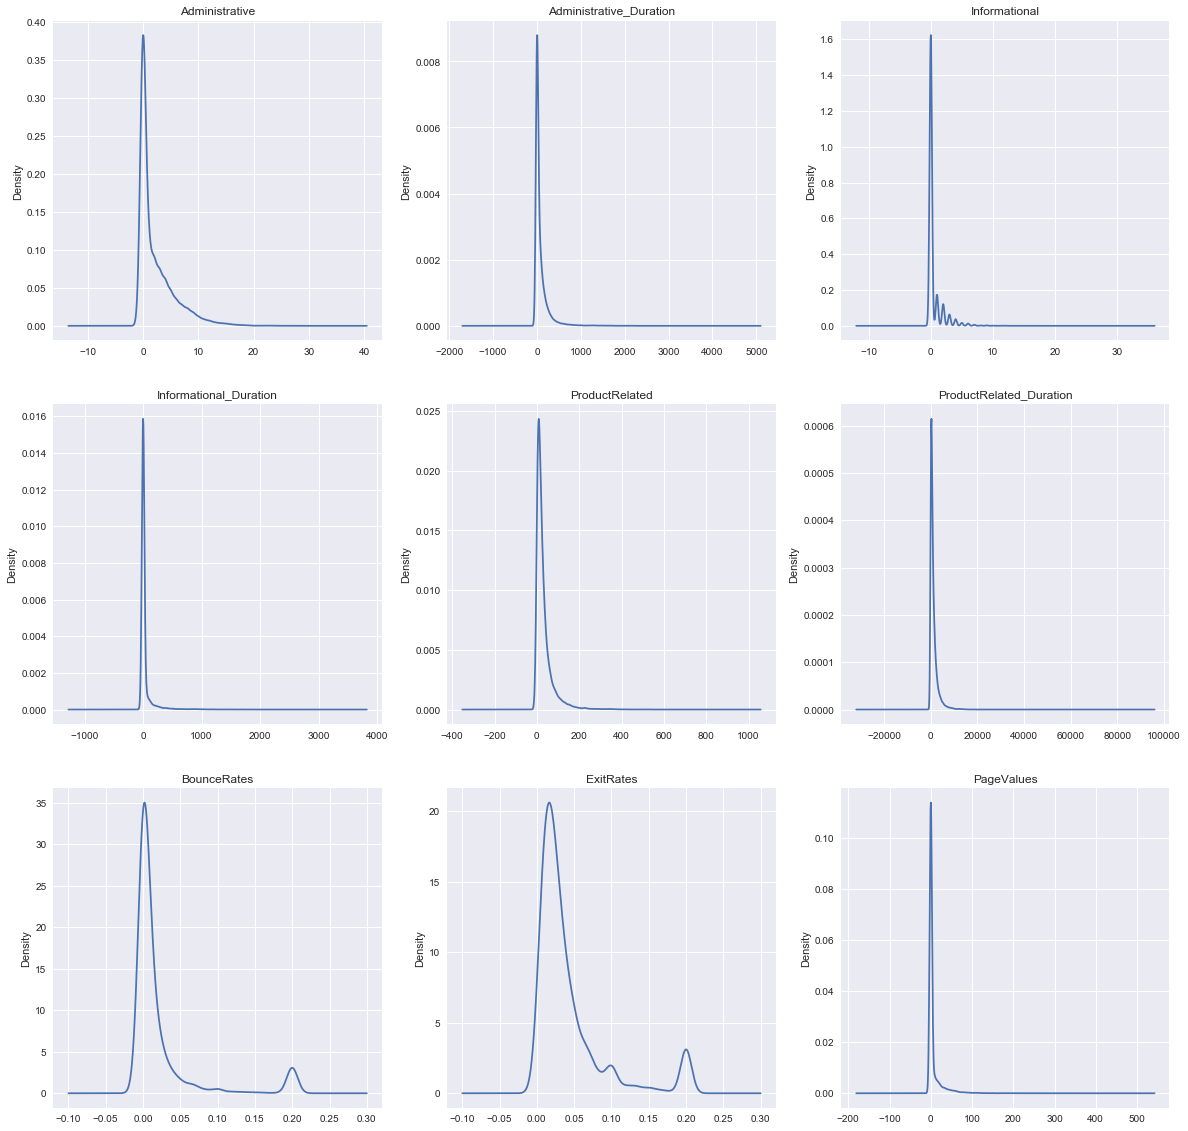

In [17]:
plot_distplot(data=dataset_no_na, features=cont, univariate=True)

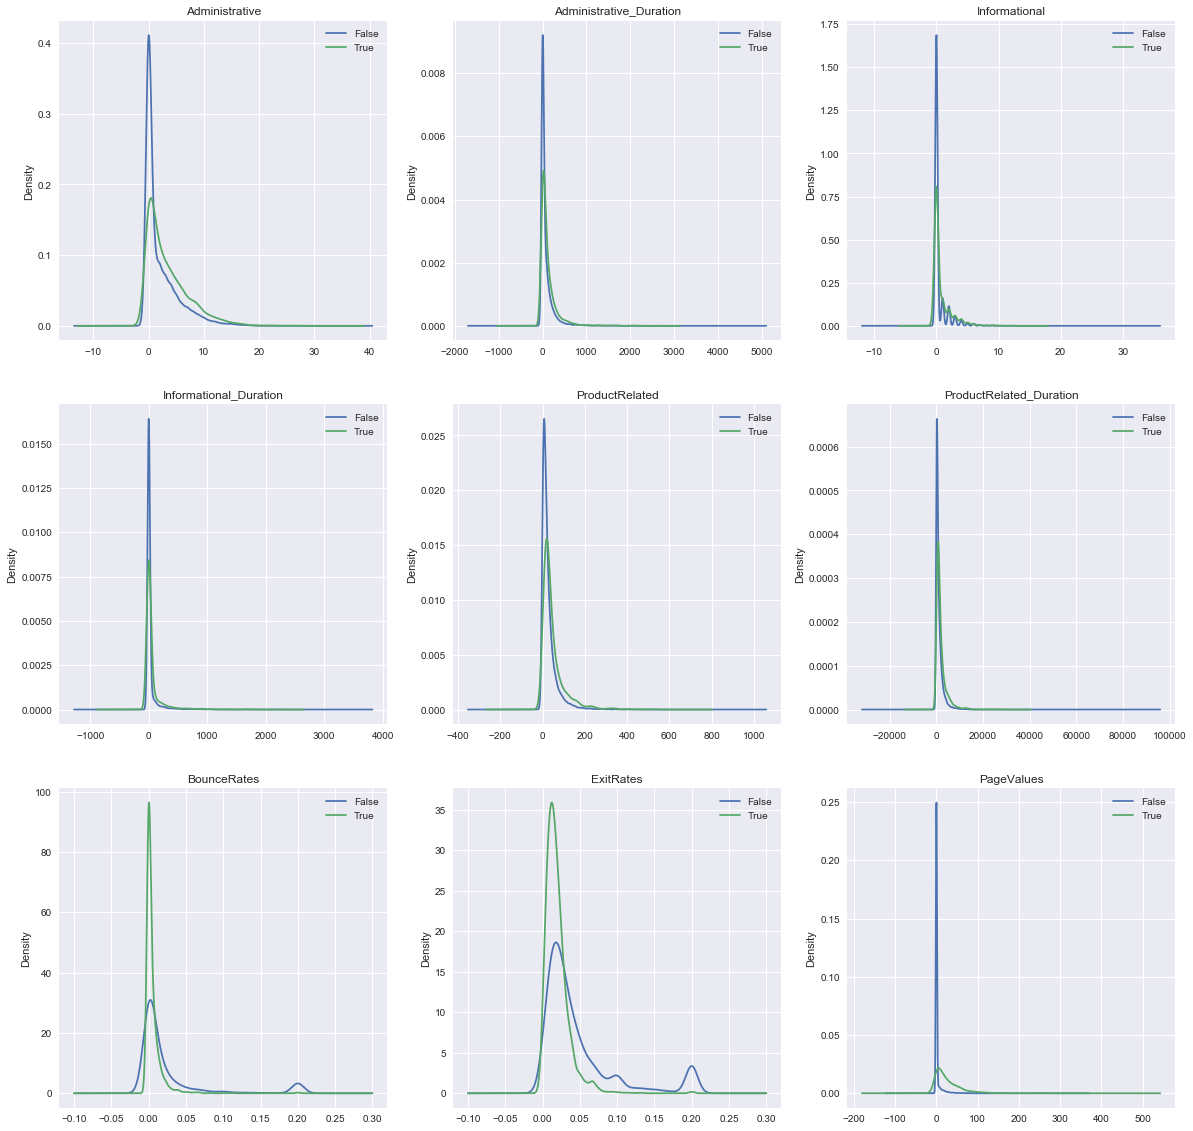

In [18]:
plot_distplot(data=dataset_no_na, features=cont, target='Revenue', univariate=False)

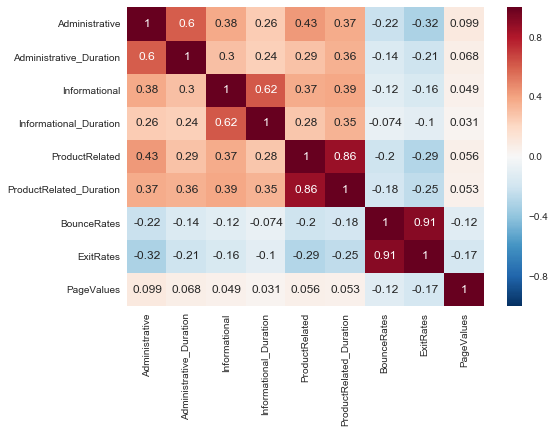

In [19]:
sns.heatmap(data=dataset_no_na.iloc[:, :9].corr(), annot=True)

In [20]:
removed_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates']
filtered_dataset = dataset_no_na.drop(removed_features, axis=1)

In [21]:
dumm_dataset = pd.get_dummies(data=filtered_dataset, columns=filtered_dataset.columns[5:-1])
dumm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 77 columns):
Administrative                   12330 non-null float64
Informational                    12330 non-null float64
ProductRelated                   12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
Revenue                          12330 non-null bool
SpecialDay_0.0                   12330 non-null uint8
SpecialDay_0.2                   12330 non-null uint8
SpecialDay_0.4                   12330 non-null uint8
SpecialDay_0.6                   12330 non-null uint8
SpecialDay_0.8                   12330 non-null uint8
SpecialDay_1.0                   12330 non-null uint8
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June        

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
x_train_init, x_test_init, y_train, y_test = train_test_split(dumm_dataset.drop('Revenue', axis=1), dumm_dataset[['Revenue']], test_size=0.9)

In [24]:
scaler = MinMaxScaler()

In [25]:
scaled_train_data = scaler.fit_transform(x_train_init.iloc[:,:5])
x_train = np.concatenate([scaled_train_data, x_train_init.iloc[:,6:].to_numpy()], axis=1)

In [26]:
scaled_test_data = scaler.transform(x_test_init.iloc[:,:5])
x_test = np.concatenate([scaled_test_data, x_test_init.iloc[:,6:].to_numpy()], axis=1)

In [27]:
clfs = [LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

In [28]:
kfold = KFold(n_splits=10)

In [29]:
models = {type(clf).__name__:[(clf
       .fit(x_train[train, :], y_train.iloc[train, 0]), 
       clf
       .fit(x_train[train, :], y_train.iloc[train, 0])
       .score(x_train[test, :], y_train.iloc[test, 0])) 
       for train, test in kfold.split(X=x_train)] 
 for clf in clfs}

In [30]:
top_folds = [(name, max(model, key=lambda x: x[1])) 
 for name, model in models.items()]

In [31]:
best_classifier = max(top_folds, key=lambda x: x[1][1])

In [32]:
best_classifier

('GradientBoostingClassifier',
 (GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_split=1e-07, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                n_estimators=100, presort='auto', random_state=None,
                subsample=1.0, verbose=0, warm_start=False),
  0.9354838709677419))

In [33]:
best_classifier[1][0].score(x_test, y_test)

0.8961881589618816

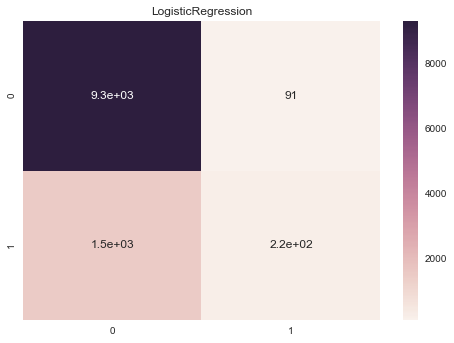

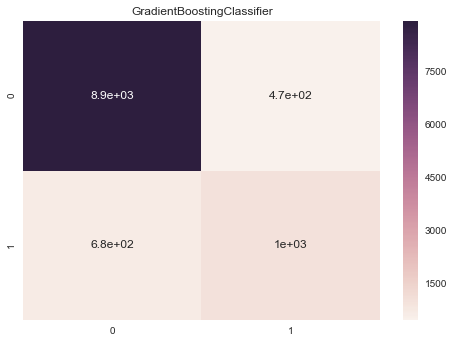

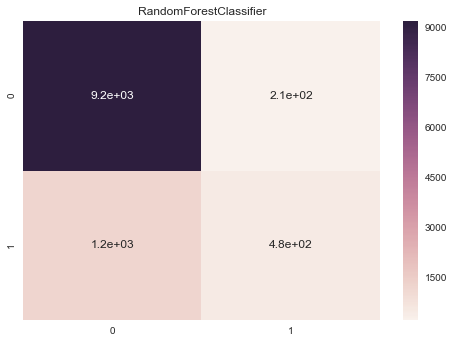

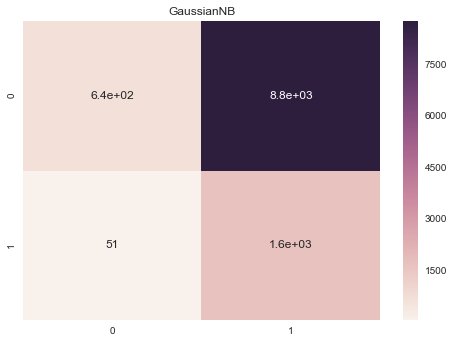

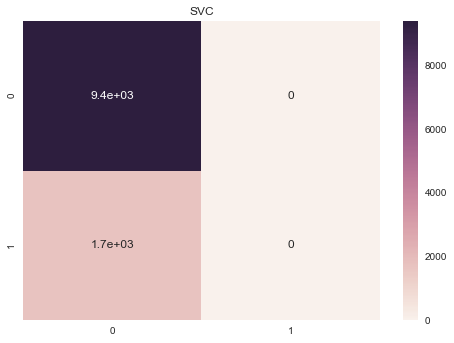

In [34]:
for model in top_folds:
    y_pred = model[1][0].predict(x_test)
    plt.figure()
    plt.title(model[0])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [35]:
for model in top_folds:
    y_pred = model[1][0].predict(x_test)
    print(model[0])
    print(classification_report(y_test, y_pred))

LogisticRegression
             precision    recall  f1-score   support

      False       0.86      0.99      0.92      9397
       True       0.70      0.13      0.22      1700

avg / total       0.84      0.86      0.81     11097

GradientBoostingClassifier
             precision    recall  f1-score   support

      False       0.93      0.95      0.94      9397
       True       0.68      0.60      0.64      1700

avg / total       0.89      0.90      0.89     11097

RandomForestClassifier
             precision    recall  f1-score   support

      False       0.88      0.98      0.93      9397
       True       0.69      0.28      0.40      1700

avg / total       0.85      0.87      0.85     11097

GaussianNB
             precision    recall  f1-score   support

      False       0.93      0.07      0.13      9397
       True       0.16      0.97      0.27      1700

avg / total       0.81      0.21      0.15     11097

SVC
             precision    recall  f1-score   support

  

C:\Users\Piyush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
